In [4]:
!pip install imutils

In [5]:
import tensorflow as tf
from imutils import paths
import os
import numpy as np
import pandas as pd
import cv2
import warnings
warnings.simplefilter('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input
from keras.models import Model
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

import random
import time



#ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = (15, 8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
DATAPATH = '../input/product-image-amazone/Categories'

CATEGORIES = np.array(sorted(os.listdir(DATAPATH + '/test_set')))

IMAGESIZE = 224
CHANNELS = 3
BATCHSIZE= 64

# <span style="color:#51c9e7;">Categories Distribution</span>

In [6]:
def categories_counts():
    count_list = np.zeros(len(CATEGORIES))
    for _, categories in enumerate(CATEGORIES):
        count_list[_] = len(os.listdir(os.path.join(DATAPATH, "test_set", categories)))
    return count_list
count_list = categories_counts()


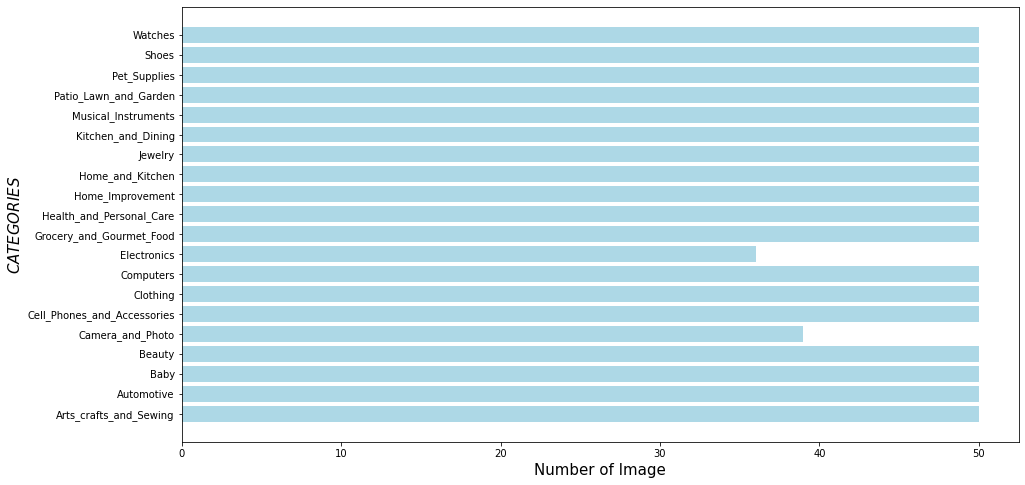

In [7]:
plt.barh(CATEGORIES, count_list, color="lightblue")
plt.ylabel("$CATEGORIES$", size=15)
plt.xlabel("Number of Image", size=15)
plt.show()

# <span style="color:#51c9e7;">Visualizing</span>

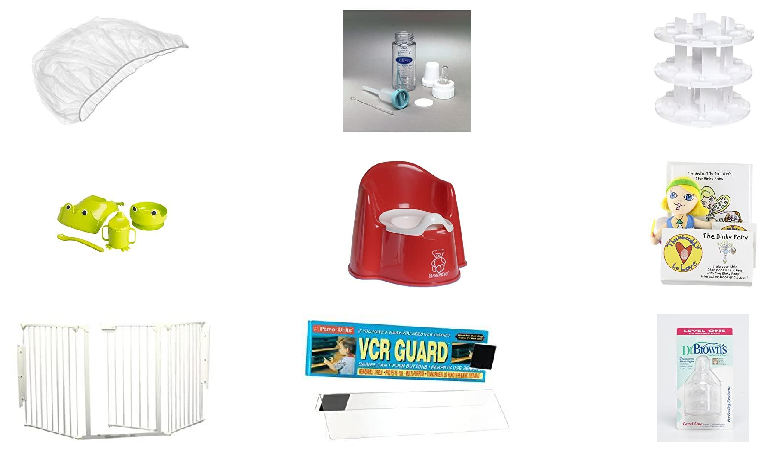

In [8]:
# lấy danh sách các file ảnh train
def visualizing_categories(categories):
    categ_image_path = list(paths.list_images(DATAPATH + '/train_set/' + categories))
    random.shuffle(categ_image_path)
    categ_image_path = categ_image_path[0:9]
    for idx, image_path in enumerate(categ_image_path):
        plt.subplot(3, 3, idx+1)
        image_arr = cv2.imread(image_path)
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
        
        plt.imshow(image_arr)
        plt.axis("off")

visualizing_categories("Baby")    

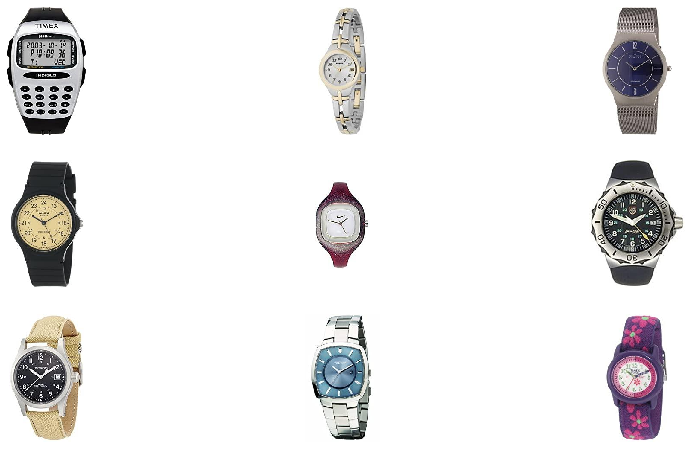

In [9]:
visualizing_categories("Watches")  

# <span style="color:#51c9e7;">TF Data</span>

In [6]:
# lấy danh sách các file ảnh train
train_image_path = list(paths.list_images(DATAPATH + '/train_set'))
random.shuffle(train_image_path)
# lấy danh sách các file ảnh val
valid_image_path = list(paths.list_images(DATAPATH + '/valid_set'))
random.shuffle(valid_image_path)
# Build một hàm xử lý ảnh
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, (IMAGESIZE, IMAGESIZE))
    image = image / 255.
    
    label = tf.strings.split(image_path, os.path.sep)[-2]
    oneHot = label == CATEGORIES
    encodedLabel = tf.argmax(oneHot)
    
    return (image, encodedLabel)

# dùng TF.Data để tạo pipeline load và xử lý ảnh
train_data = tf.data.Dataset.from_tensor_slices(train_image_path)
train_data = (train_data
             .map(preprocess_image, num_parallel_calls = tf.data.AUTOTUNE)
             .batch(BATCHSIZE)
             .prefetch(tf.data.AUTOTUNE)
             )

valid_data = tf.data.Dataset.from_tensor_slices(valid_image_path)
valid_data = (valid_data
             .map(preprocess_image, num_parallel_calls = tf.data.AUTOTUNE)
             .batch(BATCHSIZE)
             .prefetch(tf.data.AUTOTUNE)
             )


2022-10-12 16:38:50.791142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 16:38:50.891024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 16:38:50.891831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 16:38:50.894024: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
test_image_path = list(paths.list_images(DATAPATH + "/test_set"))
test_data = tf.data.Dataset.from_tensor_slices(test_image_path)
test_data = (test_data
             .map(preprocess_image, num_parallel_calls = tf.data.AUTOTUNE)
              .shuffle(2048)
             .batch(BATCHSIZE)
             .prefetch(tf.data.AUTOTUNE)
             )

# <span style="color:#51c9e7;">Data Augmentation</span>

In [ ]:
# def augmentation_pipeline(image, label):
#     image = tf.image.random_flip_left_right(image)
#     return image, label
# def get_training_dataset(train_image_path):
#     dataset = tf.data.Dataset.from_tensor_slices(train_image_path)
#     dataset = dataset.map(preprocess_image, num_parallel_calls = tf.data.AUTOTUNE)
#     dataset = dataset.shuffle(2048)
#     dataset = dataset.batch(64)
#     dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
#     return dataset

# <span style="color:#51c9e7;">Classification</span>

## SVM

In [ ]:
# model = Sequential(name='SVM')

# model.add(Conv2D(filters=112, kernel_size=(3, 3), strides=2, padding='same', input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# model.add(Conv2D(filters=112, kernel_size=(3, 3), strides=2, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))

# model.add(Dense(20,kernel_regularizer=l2(0.0001)))
# model.add(Activation('softmax'))

# model.compile(optimizer=SGD(learning_rate=  0.00005),
#                                 loss='squared_hinge',
#                                 metrics = ['accuracy'])

# model.summary()

## Alexnet

In [95]:
NAME = "alex_net_{}".format(int(time.time()))
model = Sequential(name=NAME)

model.add(Conv2D(input_shape=(IMAGESIZE, IMAGESIZE, CHANNELS),kernel_size=(11,11),filters=96,strides=4))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3),strides=2))

model.add(Conv2D(kernel_size=(5,5),filters=256,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(kernel_size=(3,3),filters=384,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(kernel_size=(3,3),filters=384,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(kernel_size=(3,3),filters=256,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3),strides=2))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(20))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=0.00001),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "alex_net_1665561524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_48 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
activation_49 (Activation)   (None, 26, 26, 256)       0         
_________________________________________________________________
batch_normalization_59 (Batc (None, 26, 26, 256

In [96]:
filepath = "{}.hdf5".format(NAME)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch"
)
history = model.fit(train_data,
                    validation_data = valid_data,
                    epochs = 30,
                   callbacks=[checkpoint])

Epoch 1/30
110/110 [==============================] - 11s 98ms/step - loss: 4.4534 - accuracy: 0.0783 - val_loss: 3.0325 - val_accuracy: 0.0513

Epoch 00001: val_loss improved from inf to 3.03255, saving model to alex_net_1665561524.hdf5
Epoch 2/30
110/110 [==============================] - 11s 103ms/step - loss: 3.1963 - accuracy: 0.1359 - val_loss: 3.1075 - val_accuracy: 0.0524

Epoch 00002: val_loss did not improve from 3.03255
Epoch 3/30
110/110 [==============================] - 11s 98ms/step - loss: 2.8416 - accuracy: 0.1856 - val_loss: 3.1106 - val_accuracy: 0.0689

Epoch 00003: val_loss did not improve from 3.03255
Epoch 4/30
110/110 [==============================] - 11s 96ms/step - loss: 2.6387 - accuracy: 0.2228 - val_loss: 2.8884 - val_accuracy: 0.1219

Epoch 00004: val_loss improved from 3.03255 to 2.88840, saving model to alex_net_1665561524.hdf5
Epoch 5/30
110/110 [==============================] - 11s 97ms/step - loss: 2.5079 - accuracy: 0.2638 - val_loss: 2.5877 - val_

In [97]:
model.evaluate(test_data)

16/16 [==============================] - 2s 41ms/step - loss: 2.1873 - accuracy: 0.4113


[2.1872735023498535, 0.4112820625305176]

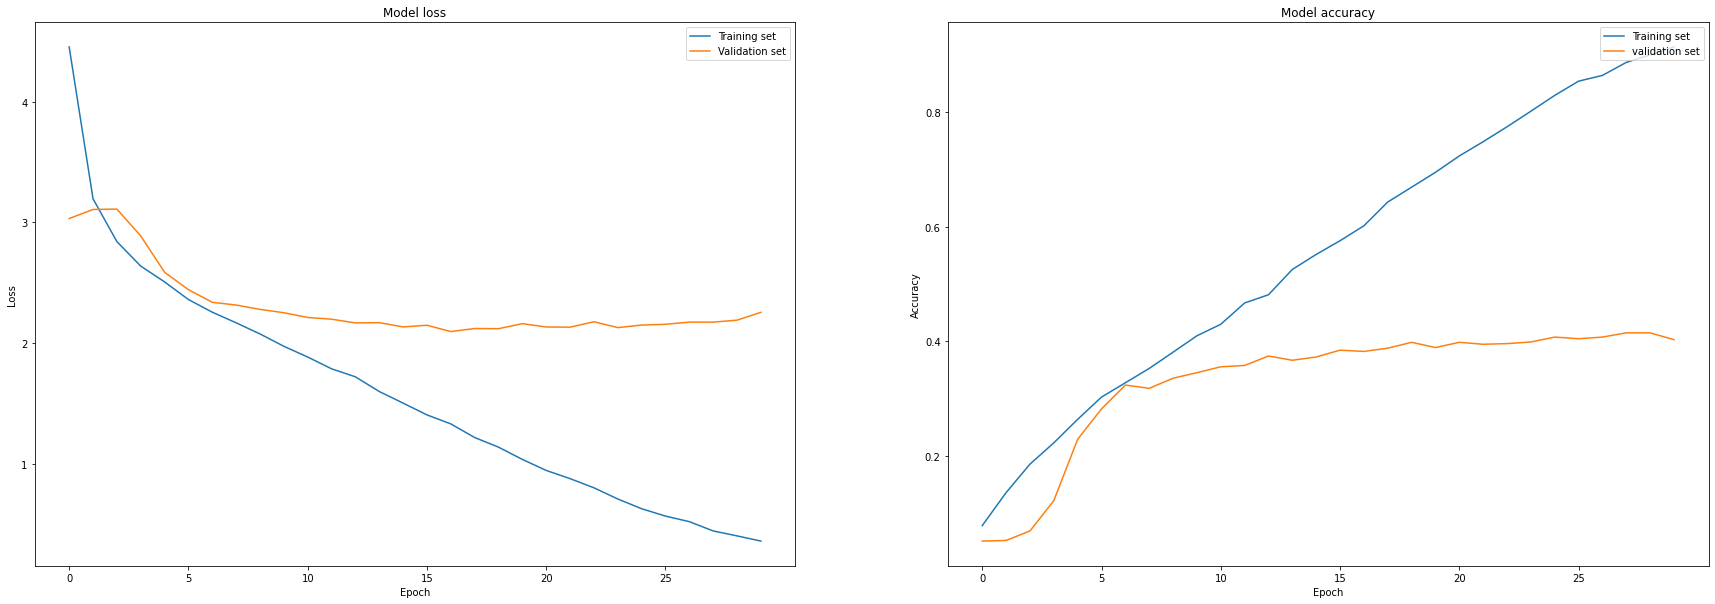

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(history.history['loss'], label="Training set")
ax[0].plot(history.history['val_loss'], label="Validation set")
ax[0].set_title("Model loss")
ax[0].set_xticks([int(i) for i in np.arange(0, 30, 5)])
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend( loc='upper right')

ax[1].plot(history.history["accuracy"], label="Training set")
ax[1].plot(history.history["val_accuracy"], label="validation set")
ax[1].set_title("Model accuracy")
ax[1].set_xticks([int(i) for i in np.arange(0, 30, 5)])
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend( loc='upper right')
plt.show()

In [99]:
def predict_image_test(image_path):
    plt.figure(figsize=(5, 5))
    image = cv2.imread(image_path)
    image_arr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_arr = cv2.resize(image_arr, (224, 224))
    image_arr = image_arr / 255.
    categories = sorted(os.listdir(DATAPATH + '/test_set'))
    
    label = image_path.split(os.path.sep)[-2]
    classes = categories.index(label)
    
    X_tmp = image_arr.reshape(-1, 224, 224, 3)
    plt.imshow(image)
    idx = model.predict(X_tmp).argmax()
    print("Predict: {}\nTrue:{}".format(categories[idx], categories[classes]))


Predict: Watches
True:Watches


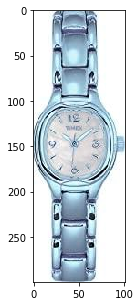

In [100]:
predict_image_test("../input/product-image-amazone/Categories/test_set/Watches/image_08954.jpg")

Predict: Watches
True:Clothing


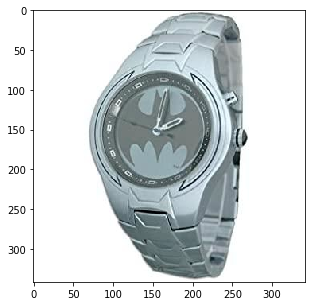

In [101]:
predict_image_test("../input/product-image-amazone/Categories/test_set/Clothing/image_09304.jpg")

Predict: Clothing
True:Clothing


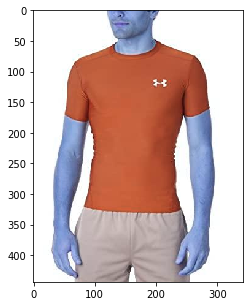

In [102]:
predict_image_test("../input/product-image-amazone/Categories/test_set/Clothing/image_08955.jpg")

## VGG 16

In [ ]:
lr = 0.01
MODELNAME = "VGG16-{}".format(int(time.time()))
model = Sequential(name=MODELNAME)

model.add(Conv2D(name="Conv1-1",
                 input_shape=(224, 224, 3),
                 filters=64,
                 kernel_size=(3, 3),
                 padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv1-2",
                filters=64,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(MaxPool2D(pool_size=(2, 2),
                 strides=(2, 2)))

model.add(Conv2D(name="Conv2-1",
                filters=128,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv2-2",
                filters=128,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(MaxPool2D(pool_size=(2, 2),
                 strides=(2, 2)))

model.add(Conv2D(name="Conv3-1",
                filters=256,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv3-2",
                filters=256,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv3-3",
                filters=256,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(MaxPool2D(pool_size=(2, 2),
                 strides=(2, 2)))

model.add(Conv2D(name="Conv4-1",
                filters=512,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv4-2",
                filters=512,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv4-3",
                filters=512,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(MaxPool2D(pool_size=(2, 2),
                 strides=(2, 2)))

model.add(Conv2D(name="Conv5-1",
                filters=512,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv5-2",
                filters=512,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(name="Conv5-3",
                filters=512,
                kernel_size=(3, 3),
                padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(MaxPool2D(pool_size=(2, 2),
                 strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=4096))
model.add(Activation("relu"))

model.add(Dense(units=4096))
model.add(Activation("relu"))

model.add(Dense(units=20))
model.add(Activation("softmax"))

model.compile(optimizer=SGD(lr),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.summary()



In [ ]:
filepath="./{}.hdf5".format(MODELNAME)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch"
)

history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=50,
                    verbose=1,
                   callbacks=[checkpoint])

# Nhận xét:
- Mô hình VGG16 lúc chưa có Dropout, BN, SGD, lr = 0.01
    - Chạy 50 epoch mất 1tiếng30p
    - Hội tụ chậm, overfitting\n
- Mô hình VGG16 thêm BN sau mỗi activation của các Conv và Dense, thêm dropout vào trước mỗi lần downsampling (0.2, 0.2, 0.6, 0.6)
    - Hội tụ nhanh, overfitting, val loss tăng giảm không ổn định, val acc gần như không tăng
    - sau 6 epoch - loss: 1.0029 - accuracy: 0.7108 - val_loss: 4.0853 - val_accuracy: 0.0752
- Tăng tất cả (4) rate dropout lên 0.6
    - Không cải thiện

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(history.history['loss'], label="Training set")
ax[0].plot(history.history['val_loss'], label="Validation set")
ax[0].set_title("Model loss")
ax[0].set_xticks([int(i) for i in np.arange(0, 50, 5)])
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend( loc='upper right')

ax[1].plot(history.history["accuracy"], label="Training set")
ax[1].plot(history.history["val_accuracy"], label="validation set")
ax[1].set_title("Model accuracy")
ax[1].set_xticks([int(i) for i in np.arange(0, 50, 5)])
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend( loc='upper right')
plt.show()

In [ ]:
def predict_image_test(image_path):
    plt.figure(figsize=(5, 5))
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image / 255.
    categories = sorted(os.listdir(DATAPATH + '/test_set'))
    
    label = image_path.split(os.path.sep)[-2]
    classes = categories.index(label)
    
    X_tmp = image.reshape(-1, 224, 224, 3)
    plt.imshow(image)
    idx = model.predict(X_tmp).argmax()
    print("Predict: {}\nTrue:{}".format(categories[idx], categories[classes]))


In [ ]:
predict_image_test("../input/product-image-amazone/Categories/test_set/Beauty/image_09408.jpg")

In [ ]:
predict_image_test("../input/product-image-amazone/Categories/test_set/Watches/image_09118.jpg")

In [ ]:
predict_image_test("../input/product-image-amazone/Categories/test_set/Health_and_Personal_Care/image_08977.jpg")

# <span style="color:#51c9e7;">Recommendation</span>

## Load, test model phân lớp

In [7]:
# lấy danh sách các file ảnh train
train_image_path = list(paths.list_images(DATAPATH + '/train_set'))
random.shuffle(train_image_path)
# lấy danh sách các file ảnh val
valid_image_path = list(paths.list_images(DATAPATH + '/valid_set'))
random.shuffle(valid_image_path)
# Build một hàm xử lý ảnh
def preprocess_image_label(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, (IMAGESIZE, IMAGESIZE))
    image = image / 255.
    
    label = tf.strings.split(image_path, os.path.sep)[-2]
    oneHot = label == CATEGORIES
    encodedLabel = tf.argmax(oneHot)
    
    return (image, encodedLabel)

# dùng TF.Data để tạo pipeline load và xử lý ảnh
train_data = tf.data.Dataset.from_tensor_slices(train_image_path)
train_data = (train_data
             .map(preprocess_image_label, num_parallel_calls = tf.data.AUTOTUNE)
             .batch(BATCHSIZE)
             .prefetch(tf.data.AUTOTUNE)
             )

2022-10-12 16:45:30.719638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 16:45:30.822816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 16:45:30.823707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 16:45:30.826702: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
test_image_path = list(paths.list_images(DATAPATH + '/test_set'))
test_data = tf.data.Dataset.from_tensor_slices(test_image_path)
test_data = (test_data
             .map(preprocess_image_label, num_parallel_calls = tf.data.AUTOTUNE)
             .batch(100)
             )

In [9]:
model = load_model(r"../input/vgg16-16/alex_net_1665561524.hdf5")

In [10]:
model.evaluate(test_data)

2022-10-12 16:45:42.795186: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-12 16:45:44.849280: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


10/10 [==============================] - 12s 408ms/step - loss: 2.0738 - accuracy: 0.3877


[2.073840379714966, 0.38769230246543884]

In [13]:
# thêm đường dẫn hình và nhãn đúng vào df
df = pd.DataFrame({"image_path":train_image_path})
df["true_label"] = df["image_path"].map(lambda x : x.split("/")[-2])

In [14]:
# trích xuất tính năng thông qua mô hình phân lớp
img_features = model.predict(train_data)

In [15]:
# thêm tính năng đã được trích xuất và nhãn dự đoán vào df
df["feature_extracted"] = [feature for feature in img_features]
df["predict_label"] = df["feature_extracted"].map(lambda x : CATEGORIES[x.argmax()])

In [16]:
df

,image_path,true_label,feature_extracted,predict_label
0,../input/product-image-amazone/Categories/trai...,Home_and_Kitchen,"[0.044151623, 0.011289681, 0.02511459, 0.01340...",Home_and_Kitchen
1,../input/product-image-amazone/Categories/trai...,Electronics,"[0.03461944, 0.028007813, 0.026251677, 0.19627...",Beauty
2,../input/product-image-amazone/Categories/trai...,Beauty,"[0.01167754, 0.0030655817, 0.0129627315, 0.766...",Beauty
3,../input/product-image-amazone/Categories/trai...,Home_Improvement,"[0.044107012, 0.015263024, 0.07445889, 0.02153...",Home_Improvement
4,../input/product-image-amazone/Categories/trai...,Computers,"[0.0064696623, 0.0010697246, 0.001608839, 0.03...",Computers
...,...,...,...,...
7015,../input/product-image-amazone/Categories/trai...,Kitchen_and_Dining,"[0.02794048, 0.07363918, 0.020980487, 0.032593...",Patio_Lawn_and_Garden
7016,../input/product-image-amazone/Categories/trai...,Home_Improvement,"[0.028939765, 0.013601748, 0.025376821, 0.0249...",Home_Improvement
7017,../input/product-image-amazone/Categories/trai...,Pet_Supplies,"[0.016397314, 0.0018307817, 0.014046026, 0.033...",Pet_Supplies
7018,../input/product-image-amazone/Categories/trai...,Arts_crafts_and_Sewing,"[0.51660377, 0.0047480725, 0.05871553, 0.00713...",Arts_crafts_and_Sewing


In [17]:
df.loc[df["true_label"] == "Watches"]

,image_path,true_label,feature_extracted,predict_label
7,../input/product-image-amazone/Categories/trai...,Watches,"[0.00034487777, 0.00035464676, 0.00011899333, ...",Watches
42,../input/product-image-amazone/Categories/trai...,Watches,"[0.008544992, 0.00111551, 0.020417938, 0.00708...",Watches
56,../input/product-image-amazone/Categories/trai...,Watches,"[0.00029394604, 0.0009909152, 2.6240808e-05, 0...",Watches
95,../input/product-image-amazone/Categories/trai...,Watches,"[3.110852e-05, 0.00014156131, 6.8847134e-05, 6...",Watches
96,../input/product-image-amazone/Categories/trai...,Watches,"[0.0009869826, 0.00015415737, 0.00011638028, 0...",Watches
...,...,...,...,...
6936,../input/product-image-amazone/Categories/trai...,Watches,"[0.004730169, 0.0040279953, 0.0342735, 0.01188...",Watches
6945,../input/product-image-amazone/Categories/trai...,Watches,"[0.0042465827, 0.0059057344, 0.0099917315, 0.0...",Watches
6948,../input/product-image-amazone/Categories/trai...,Watches,"[8.3546816e-05, 0.0003180567, 5.2001356e-05, 0...",Watches
6974,../input/product-image-amazone/Categories/trai...,Watches,"[0.0009909187, 0.022576977, 0.0012582804, 0.01...",Watches


# recommend

In [18]:
def cosine_similarity(A, B):
    cos_sim = np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))
    return cos_sim

In [21]:
# cosine của 2 đồng hồ
cosine_similarity(df["feature_extracted"][7], df["feature_extracted"][42])

0.99898475

In [22]:
# cosine bất kì
cosine_similarity(df["feature_extracted"][7], df["feature_extracted"][8])

0.015284024

In [30]:
def recommendation_system(search_image_path, df, n=9):
    # hàm xử lý ảnh
    def image_preprocess(image_path):
        image_orig = cv2.imread(image_path)
        image_arr = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
        image_arr = cv2.resize(image_arr, (IMAGESIZE, IMAGESIZE))
        image_arr = image_arr/255.
        image_arr = image_arr.reshape(-1, IMAGESIZE, IMAGESIZE, CHANNELS)
        return image_orig, image_arr
    # nhận về ảnh muốn tìm kiếm sau khi xử lý
    search_image_orig, search_image_arr = image_preprocess(search_image_path)
    # đặc trưng của ảnh muốn tìm kiếm
    search_image_feature_extracted = model.predict(search_image_arr)
    # tạo list để lưu key là id của ảnh trong list data, value là similarity của ảnh đó với ảnh tìm kiếm
    list_similarity = {}
    
    # lặp hết trong df
    for idx in range(df.shape[0]):
        # khoảng cách cosine của 2 đặc trưng
        cosimi = cosine_similarity(search_image_feature_extracted, df["feature_extracted"][idx])
        list_similarity[idx] = cosimi

    # sắp xếp cosimi
    cosimi_sorted = sorted(list_similarity.items(), key=lambda x: x[1])
    
    def visual_recommendation(path_list):
        plt.rcParams['figure.figsize'] = (10, 10)
        for idx, image_path in enumerate(path_list):
            plt.subplot(int(9/3) + 1, 3, idx+1)
            image_arr = cv2.imread(image_path)
            image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
            plt.imshow(image_arr)
            plt.axis("off")
    
    # in hình gốc
    print("--------------------------------------"*2)
    print("\t\t\tProducts you want to search for")
    print("--------------------------------------"*2)
    plt.rcParams['figure.figsize'] = (5, 5)
    plt.axis("off")
    plt.imshow(search_image_arr[0])
    plt.show()
    # top n hình khuyến nghị
    print("--------------------------------------"*2)
    print("\t\t\t\Recommended products")
    print("--------------------------------------"*2)
    recommend_list = []
    for i in range(n):
        # lấy idx của ảnh được recommend
        recommend_idx = cosimi_sorted[-i-1][0]
        recommend_list.append(df["image_path"][recommend_idx])
    
    visual_recommendation(recommend_list)

#    # nếu muốn in cosine score
#     print("----------------------------------------")
#     print("Recommended products")
#     print("----------------------------------------")
#     # lấy n item
#     for i in range(n):
#         # lấy idx của ảnh được recommend
#         recommend_idx = cosimi_sorted[-i-1][0]
#         recommend_image_orig, recommend_image_arr = image_preprocess(df["image_path"][recommend_idx])
#         plt.axis("off")
#         plt.rcParams['figure.figsize'] = (5, 5)
#         print("Cosine similarity score: {}".format(round(float(cosimi_sorted[-i-1][1][0]), 4)))
#         plt.imshow(recommend_image_arr[0])
#         plt.show()


----------------------------------------------------------------------------
			Products you want to search for
----------------------------------------------------------------------------


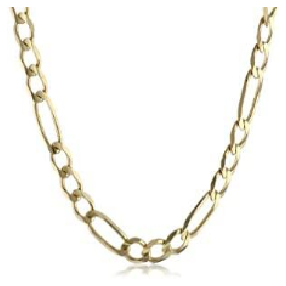

----------------------------------------------------------------------------
			\Recommended products
----------------------------------------------------------------------------


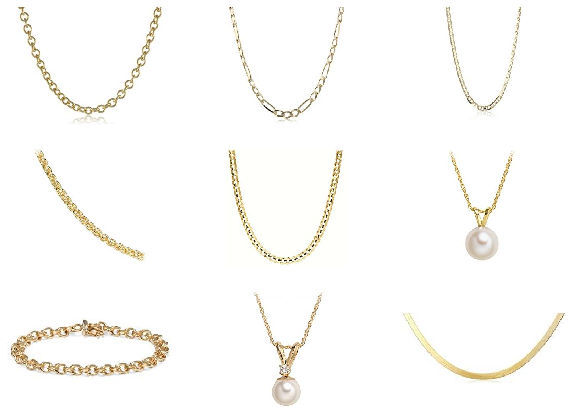

In [31]:
path = "../input/product-image-amazone/Categories/test_set/Jewelry/image_09014.jpg"
recommendation_system(path, df, 9)

----------------------------------------------------------------------------
			Products you want to search for
----------------------------------------------------------------------------


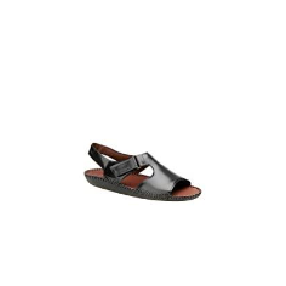

----------------------------------------------------------------------------
			\Recommended products
----------------------------------------------------------------------------


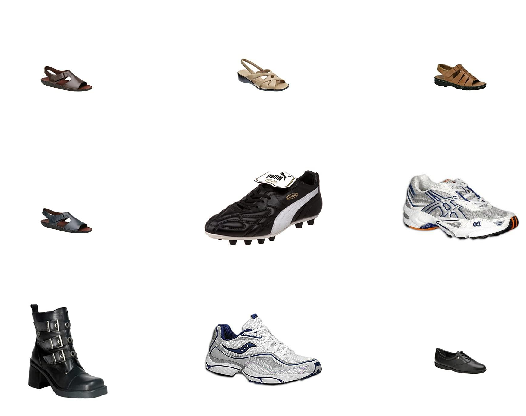

In [32]:
path = "../input/product-image-amazone/Categories/test_set/Shoes/image_08857.jpg"
recommendation_system(path, df, 9)

----------------------------------------------------------------------------
			Products you want to search for
----------------------------------------------------------------------------


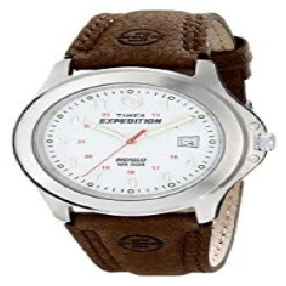

----------------------------------------------------------------------------
			\Recommended products
----------------------------------------------------------------------------


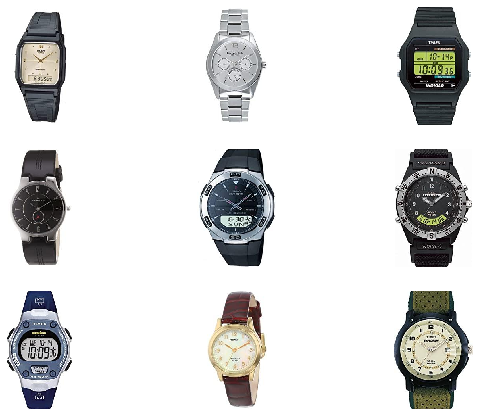

In [33]:
path = "../input/product-image-amazone/Categories/test_set/Watches/image_08851.jpg"
recommendation_system(path, df, 9)

----------------------------------------------------------------------------
			Products you want to search for
----------------------------------------------------------------------------


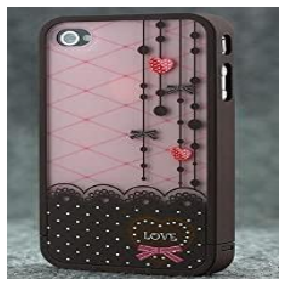

----------------------------------------------------------------------------
			\Recommended products
----------------------------------------------------------------------------


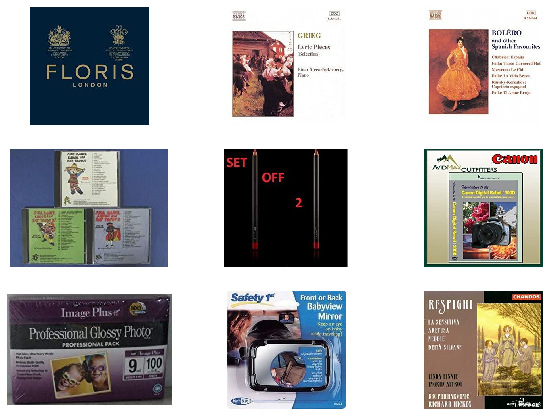

In [34]:
path = "../input/product-image-amazone/Categories/test_set/Cell_Phones_and_Accessories/image_08808.jpg"
recommendation_system(path, df, 9)

----------------------------------------------------------------------------
			Products you want to search for
----------------------------------------------------------------------------


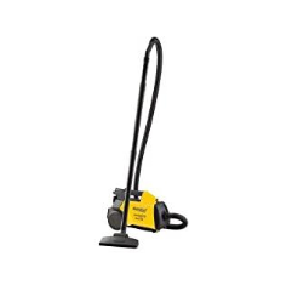

----------------------------------------------------------------------------
			\Recommended products
----------------------------------------------------------------------------


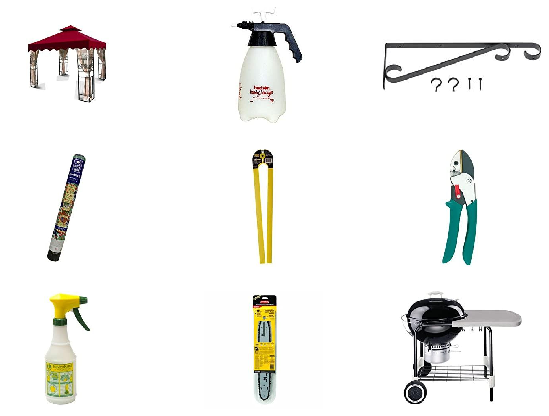

In [35]:
path = "../input/product-image-amazone/Categories/test_set/Home_and_Kitchen/image_08918.jpg"
recommendation_system(path, df, 9)

----------------------------------------------------------------------------
			Products you want to search for
----------------------------------------------------------------------------


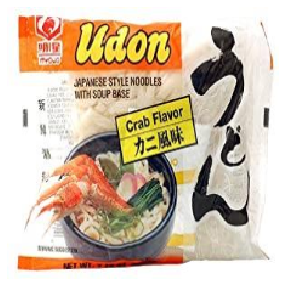

----------------------------------------------------------------------------
			\Recommended products
----------------------------------------------------------------------------


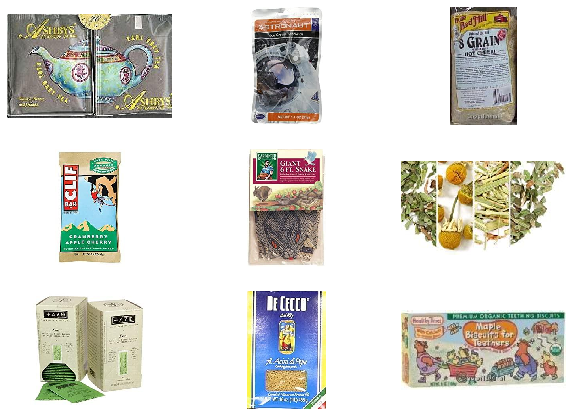

In [36]:
path = "../input/product-image-amazone/Categories/test_set/Grocery_and_Gourmet_Food/image_08807.jpg"
recommendation_system(path, df, 9)

----------------------------------------------------------------------------
			Products you want to search for
----------------------------------------------------------------------------


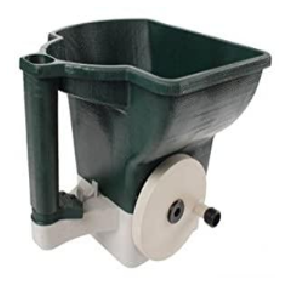

----------------------------------------------------------------------------
			\Recommended products
----------------------------------------------------------------------------


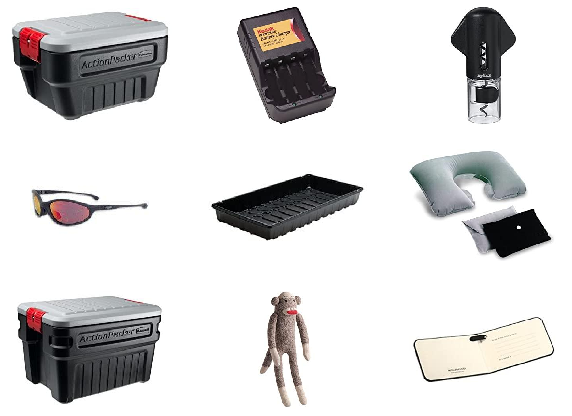

In [37]:
path = "../input/product-image-amazone/Categories/test_set/Patio_Lawn_and_Garden/image_09380.jpg"
recommendation_system(path, df, 9)

___